# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [108]:
# Utiliza todas las celdas que necesites...
df = pd.read_csv('data\Advertising.csv', index_col= 'Unnamed: 0')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [110]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


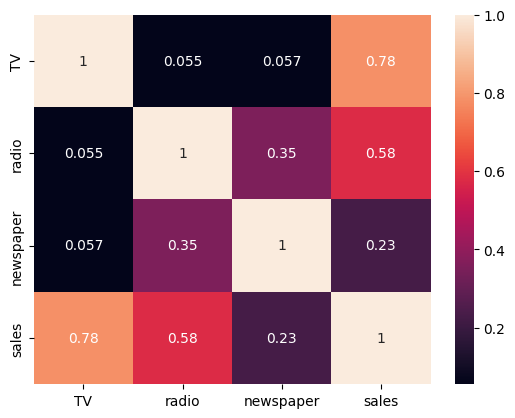

In [113]:
sns.heatmap(df.corr(), annot= True);

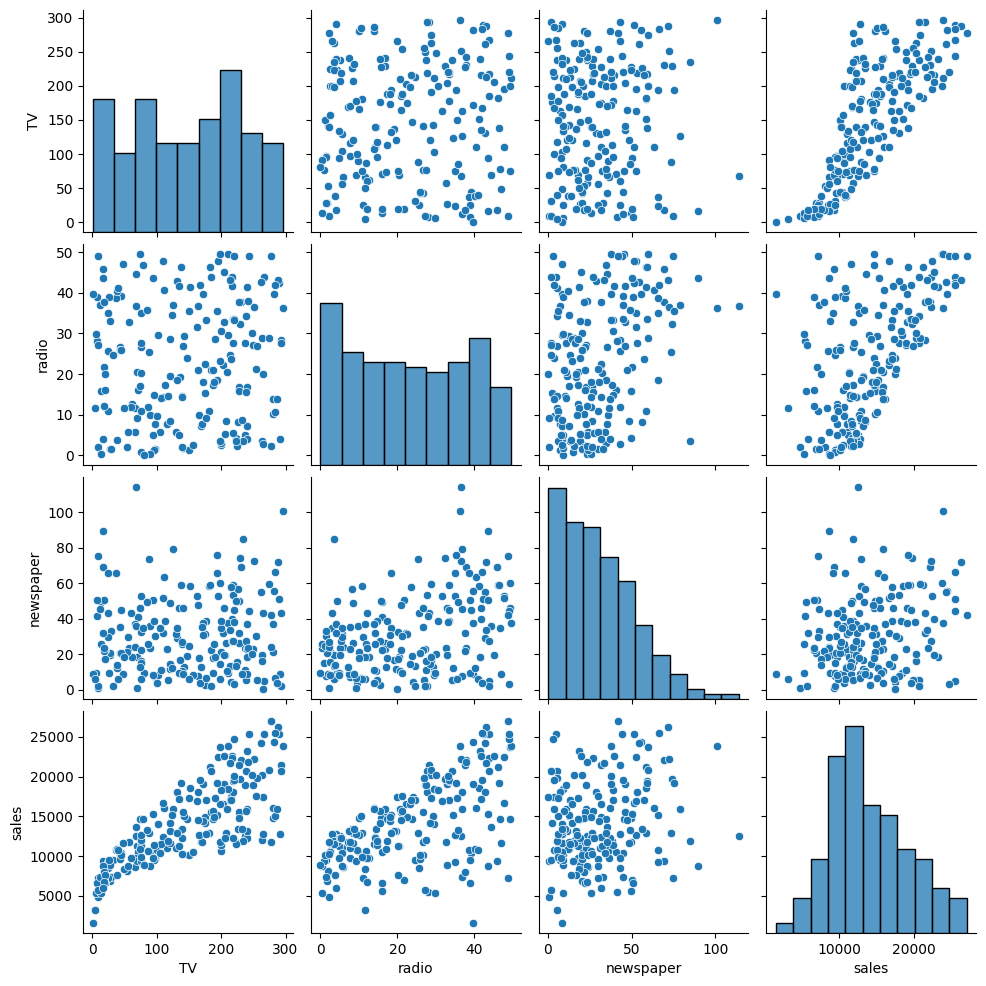

In [114]:
sns.pairplot(df);

## Modelado

In [10]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [116]:
X= df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [117]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [118]:
Y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [122]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (160, 3)
X_test shape:  (40, 3)
Y_train shape:  (160,)
Y_test shape:  (40,)


In [123]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [125]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [134]:
feature_importance = pd.DataFrame(data = linear_model.coef_, columns= ['Coeff.'], index= X_train.columns).sort_values(by= 'Coeff.')


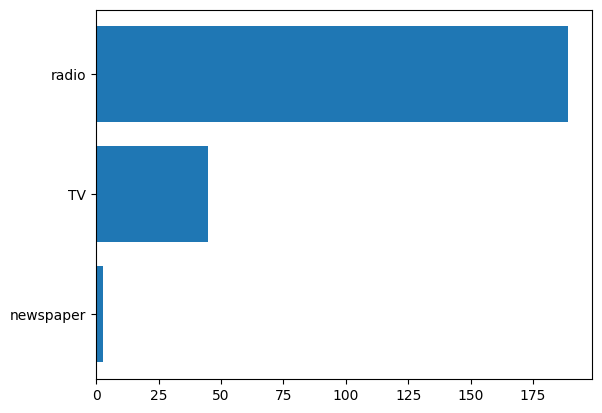

In [135]:
plt.barh(feature_importance.index, feature_importance['Coeff.']);

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [138]:
linear_model = LinearRegression()
linear_model.fit(X_train_scal, Y_train)

LinearRegression()

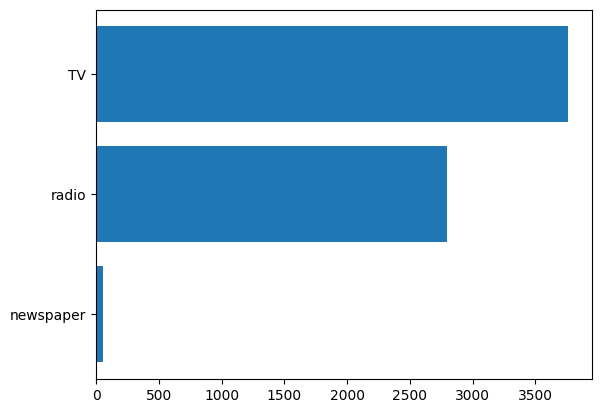

In [139]:
feature_importance = pd.DataFrame(data = linear_model.coef_, columns= ['Coeff.'], index= X_train.columns).sort_values(by= 'Coeff.')
plt.barh(feature_importance.index, feature_importance['Coeff.']);

In [87]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [88]:
# Utiliza todas las celdas que necesites...

#### Modelos entrenados:


##### 1. Linear model

In [140]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [141]:
print('Linear model: ')
print('-' * 20)
print('\n')
print('Train errors: ')
print('MAE :', mean_absolute_error(Y_train, linear_model.predict(X_train_scal)))
print('MAPE :', mean_absolute_percentage_error(Y_train, linear_model.predict(X_train_scal)))
print('\n')
print('Test errors: ')
print('MAE :', mean_absolute_error(Y_test, linear_model.predict(X_test_scal)))
print('MAPE :', mean_absolute_percentage_error(Y_test, linear_model.predict(X_test_scal)))


Linear model: 
--------------------


Train errors: 
MAE : 1198.4678961500133
MAPE : 0.13651462127119016


Test errors: 
MAE : 1460.7567168117603
MAPE : 0.15198846602831234


##### 2. Linear model Poly D2

In [142]:
from sklearn.preprocessing import PolynomialFeatures

In [143]:
poly_d2 = PolynomialFeatures(degree= 2)
poly_d2.fit(X_train_scal)

X_train_scal_d2 = poly_d2.transform(X_train_scal)
X_test_scal_d2 = poly_d2.transform(X_test_scal)

In [144]:
linear_model_d2 = LinearRegression()
linear_model_d2.fit(X_train_scal_d2, Y_train)

LinearRegression()

In [146]:
print('Linear model: ')
print('-' * 20)
print('\n')
print('Train errors: ')
print('MAE :', mean_absolute_error(Y_train, linear_model.predict(X_train_scal)))
print('MAPE :', mean_absolute_percentage_error(Y_train, linear_model.predict(X_train_scal)))
print('\n')
print('Test errors: ')
print('MAE :', mean_absolute_error(Y_test, linear_model.predict(X_test_scal)))
print('MAPE :', mean_absolute_percentage_error(Y_test, linear_model.predict(X_test_scal)))

print('\n')

print('Linear model d2: ')
print('-' * 20)
print('\n')
print('Train errors: ')
print('MAE :', mean_absolute_error(Y_train, linear_model_d2.predict(X_train_scal_d2)))
print('MAPE :', mean_absolute_percentage_error(Y_train, linear_model_d2.predict(X_train_scal_d2)))
print('\n')
print('Test errors: ')
print('MAE :', mean_absolute_error(Y_test, linear_model_d2.predict(X_test_scal_d2)))
print('MAPE :', mean_absolute_percentage_error(Y_test, linear_model_d2.predict(X_test_scal_d2)))

Linear model: 
--------------------


Train errors: 
MAE : 1198.4678961500133
MAPE : 0.13651462127119016


Test errors: 
MAE : 1460.7567168117603
MAPE : 0.15198846602831234


Linear model d2: 
--------------------


Train errors: 
MAE : 408.9721951355064
MAPE : 0.05347009333579698


Test errors: 
MAE : 526.1794444043724
MAPE : 0.048938771248171295


In [ ]:
poly_d2.fit_transform(X_train_scal)

In [156]:
poly_d2.get_feature_names_out(['TV', 'Radio', 'Newspaper'])

array(['1', 'TV', 'Radio', 'Newspaper', 'TV^2', 'TV Radio',
       'TV Newspaper', 'Radio^2', 'Radio Newspaper', 'Newspaper^2'],
      dtype=object)

In [152]:
pd.DataFrame(linear_model_d2.coef_)

,0
0,0.000000
1,3598.037111
2,2857.612436
3,81.930837
4,-795.215246
5,1380.163081
6,-125.904701
7,28.936448
8,37.368298
9,11.493873


##### 3. Linear model D3

In [147]:
poly_d3 = PolynomialFeatures(degree= 3)
poly_d3.fit(X_train_scal)

X_train_scal_d3 = poly_d3.transform(X_train_scal)
X_test_scal_d3 = poly_d3.transform(X_test_scal)

In [148]:
linear_model_d3 = LinearRegression()
linear_model_d3.fit(X_train_scal_d3, Y_train)

LinearRegression()

In [149]:
print('Linear model d3: ')
print('-' * 30)
print('\n')
print('Train errors: ')
print('MAE :', mean_absolute_error(Y_train, linear_model_d3.predict(X_train_scal_d3)))
print('MAPE :', mean_absolute_percentage_error(Y_train, linear_model_d3.predict(X_train_scal_d3)))
print('\n')
print('Test errors: ')
print('MAE :', mean_absolute_error(Y_test, linear_model_d3.predict(X_test_scal_d3)))
print('MAPE :', mean_absolute_percentage_error(Y_test, linear_model_d3.predict(X_test_scal_d3)))

Linear model d3: 
------------------------------


Train errors: 
MAE : 317.7015419249501
MAPE : 0.038765840043613484


Test errors: 
MAE : 388.68170486516374
MAPE : 0.03524411219461071


4. Linear Model D4

In [158]:
poly_d4 = PolynomialFeatures(degree= 4)
poly_d4.fit(X_train_scal)

X_train_scal_d4 = poly_d4.transform(X_train_scal)
X_test_scal_d4 = poly_d4.transform(X_test_scal)

In [161]:
linear_model_d4= LinearRegression()
linear_model_d4.fit(X_train_scal_d4, Y_train)

LinearRegression()

In [162]:
print('Linear model d4: ')
print('-' * 40)
print('\n')
print('Train errors: ')
print('MAE :', mean_absolute_error(Y_train, linear_model_d4.predict(X_train_scal_d4)))
print('MAPE :', mean_absolute_percentage_error(Y_train, linear_model_d4.predict(X_train_scal_d4)))
print('\n')
print('Test errors: ')
print('MAE :', mean_absolute_error(Y_test, linear_model_d4.predict(X_test_scal_d4)))
print('MAPE :', mean_absolute_percentage_error(Y_test, linear_model_d4.predict(X_test_scal_d4)))

Linear model d4: 
----------------------------------------


Train errors: 
MAE : 267.91900737550066
MAPE : 0.029227576835670503


Test errors: 
MAE : 544.2500038819896
MAPE : 0.05148925422684862


5. Ridge Model D3

In [163]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [164]:
baseline_error = 388.68

In [166]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal_d3, Y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scal_d3)
    ridge_error = mean_absolute_error(y_pred, Y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

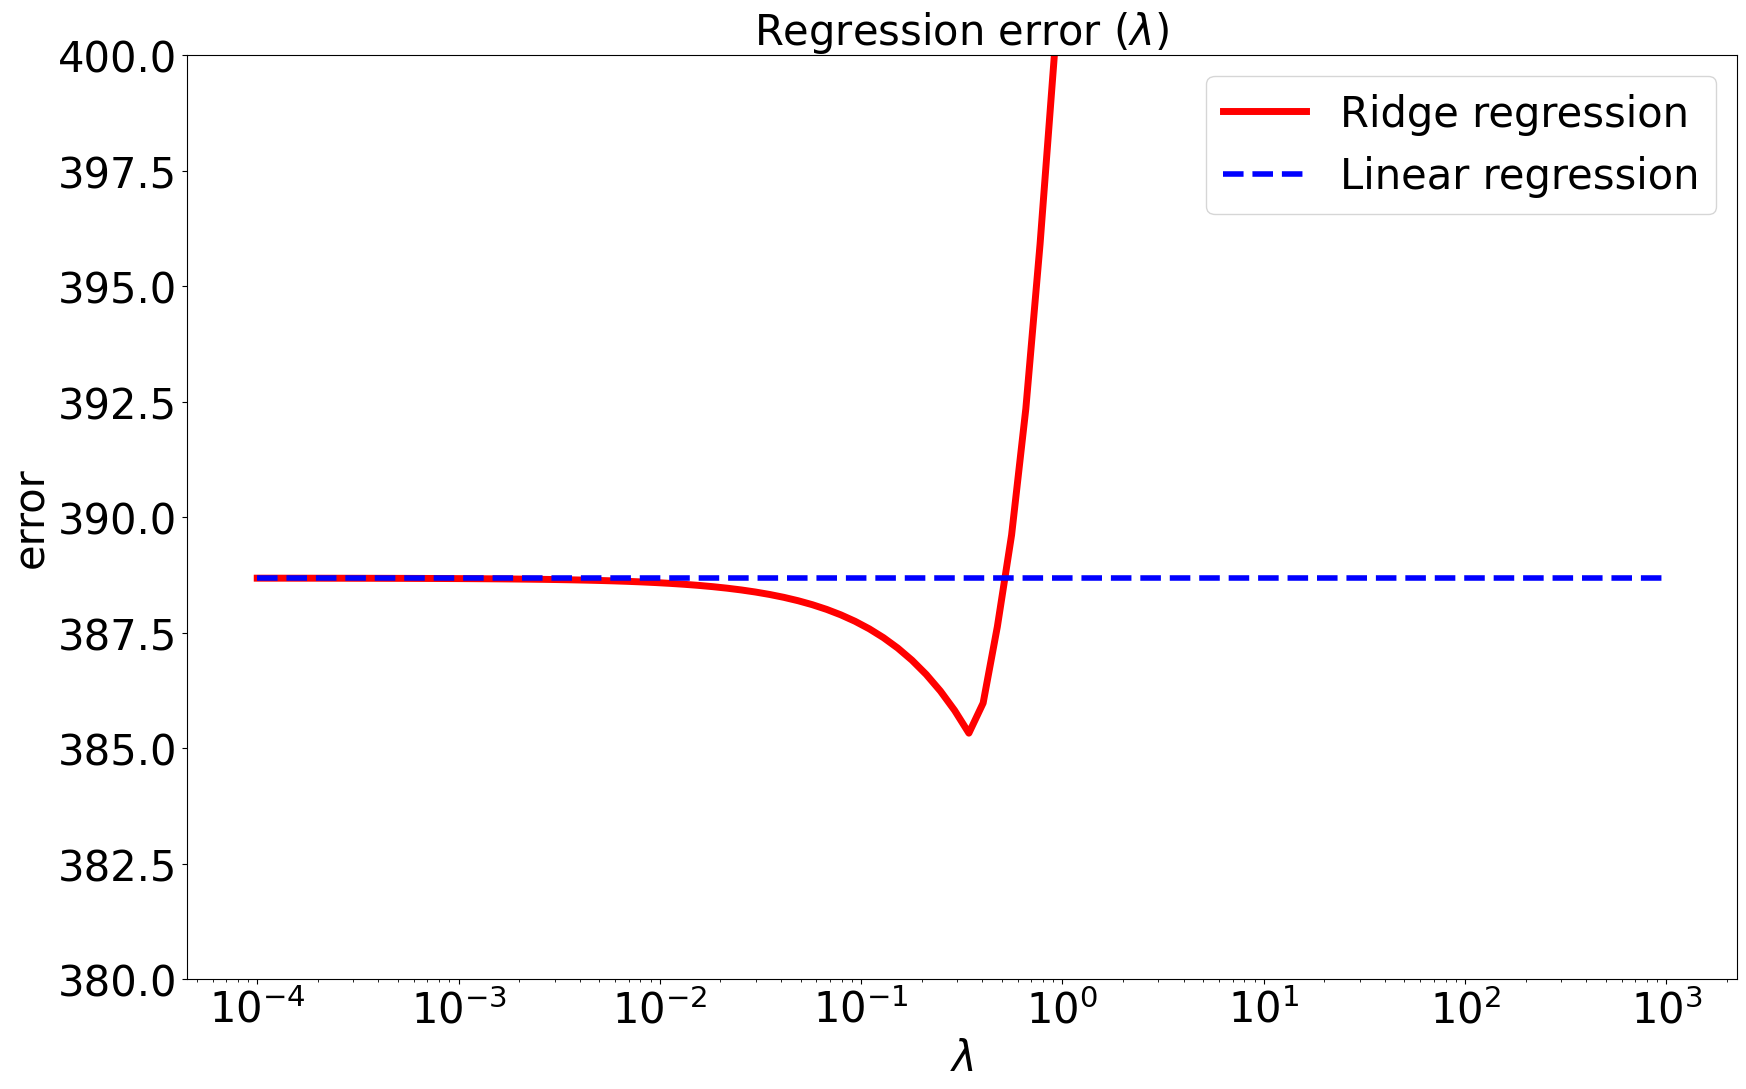

In [179]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.ylim(380, 400)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [171]:
baseline_error

388.68

In [169]:
np.min(err_ridge)

385.3263818658256

6. ##### Lasso D3

In [173]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scal_d3, Y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test_scal_d3)
    lasso_error = mean_absolute_error(y_pred, Y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

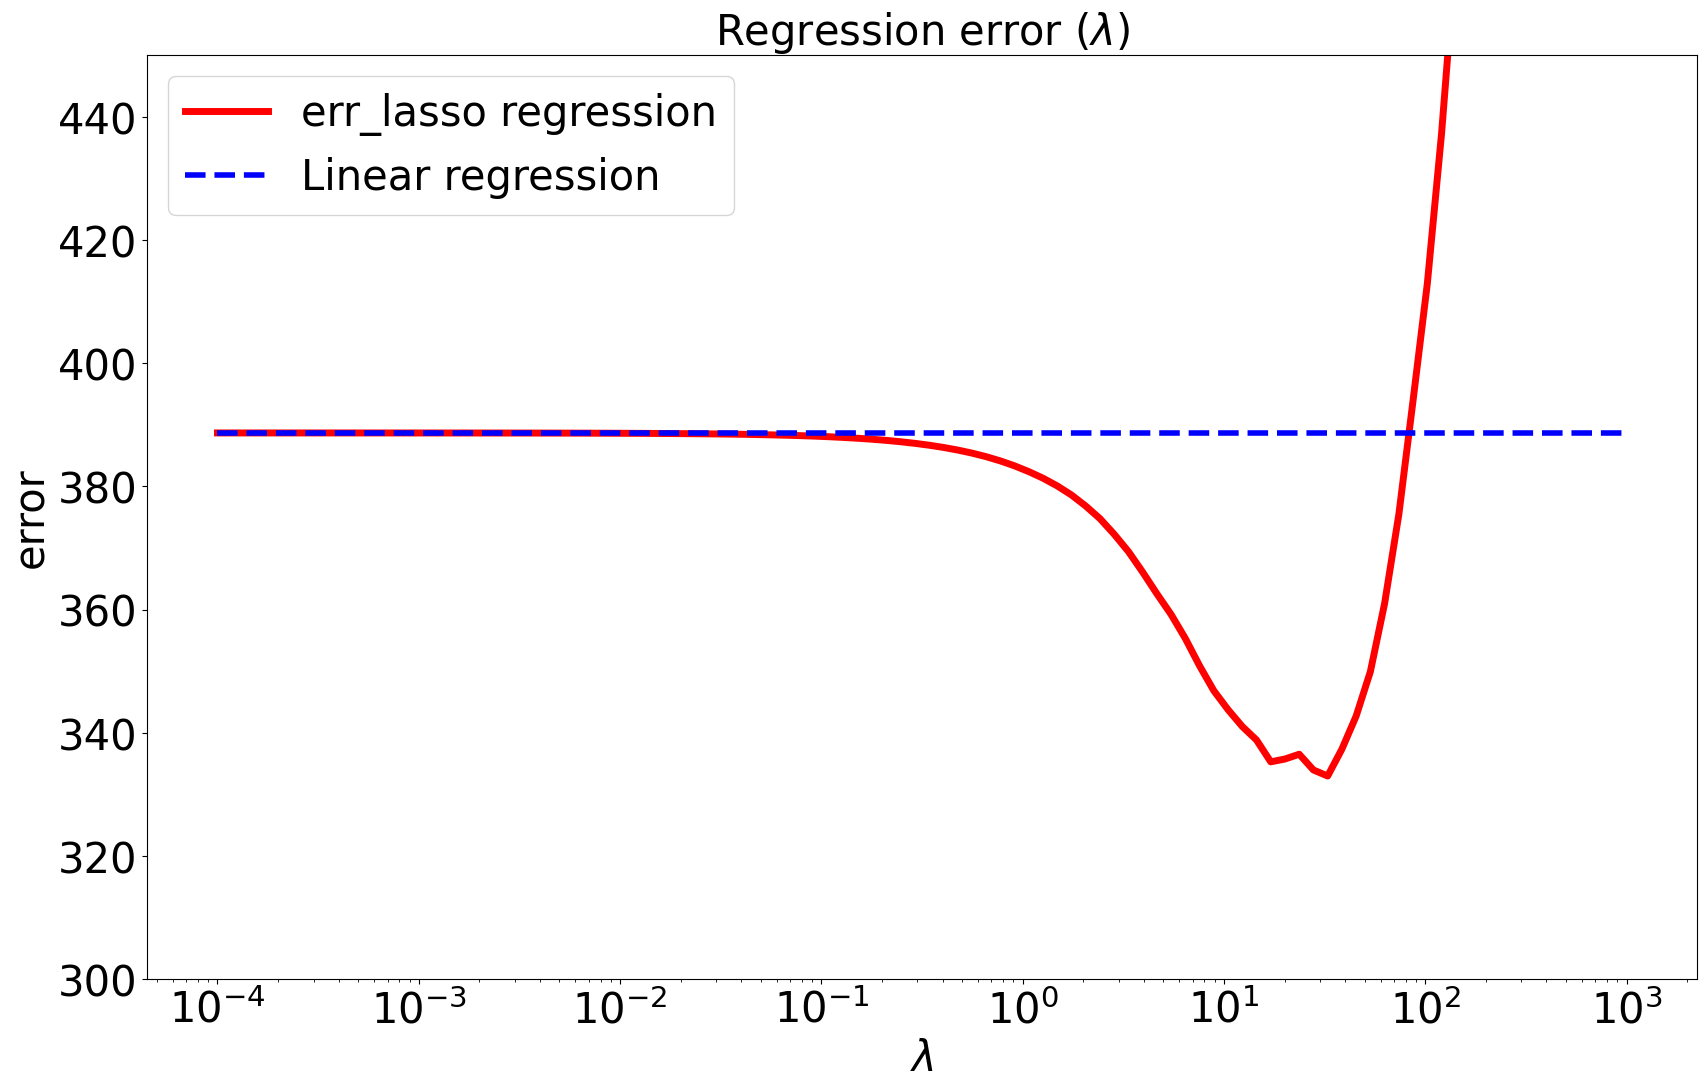

In [177]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="err_lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.ylim(300, 450)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [176]:
np.min(err_lasso)

332.98786097185354

##### ElasticNet D3

In [205]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_elastic_net_model = []
err_elastic_net_model = []
baseline = []
ratios = [0.2, 0.4, 0.6, 0.8, 1]
ratios_used = []
alphas_used = []

for a in alphas:
    for ratio in ratios:
        elastic_net_model = ElasticNet(alpha=a, l1_ratio= ratio)
        elastic_net_model.fit(X_train_scal_d3, Y_train)
        
        coef_elastic_net_model.append(elastic_net_model.coef_)
        
        y_pred = elastic_net_model.predict(X_test_scal_d3)
        elastic_net_model_error = mean_absolute_error(y_pred, Y_test)
        
        err_elastic_net_model.append(elastic_net_model_error)
        baseline.append(baseline_error)
        ratios_used.append(ratio)
        alphas_used.append(a)

In [199]:
np.min(err_elastic_net_model)

332.98786097185354

In [189]:
alphas.shape

(100,)

In [191]:
len(err_elastic_net_model)

500

In [192]:
len(alphas_used)

500

In [193]:
len(baseline)

500

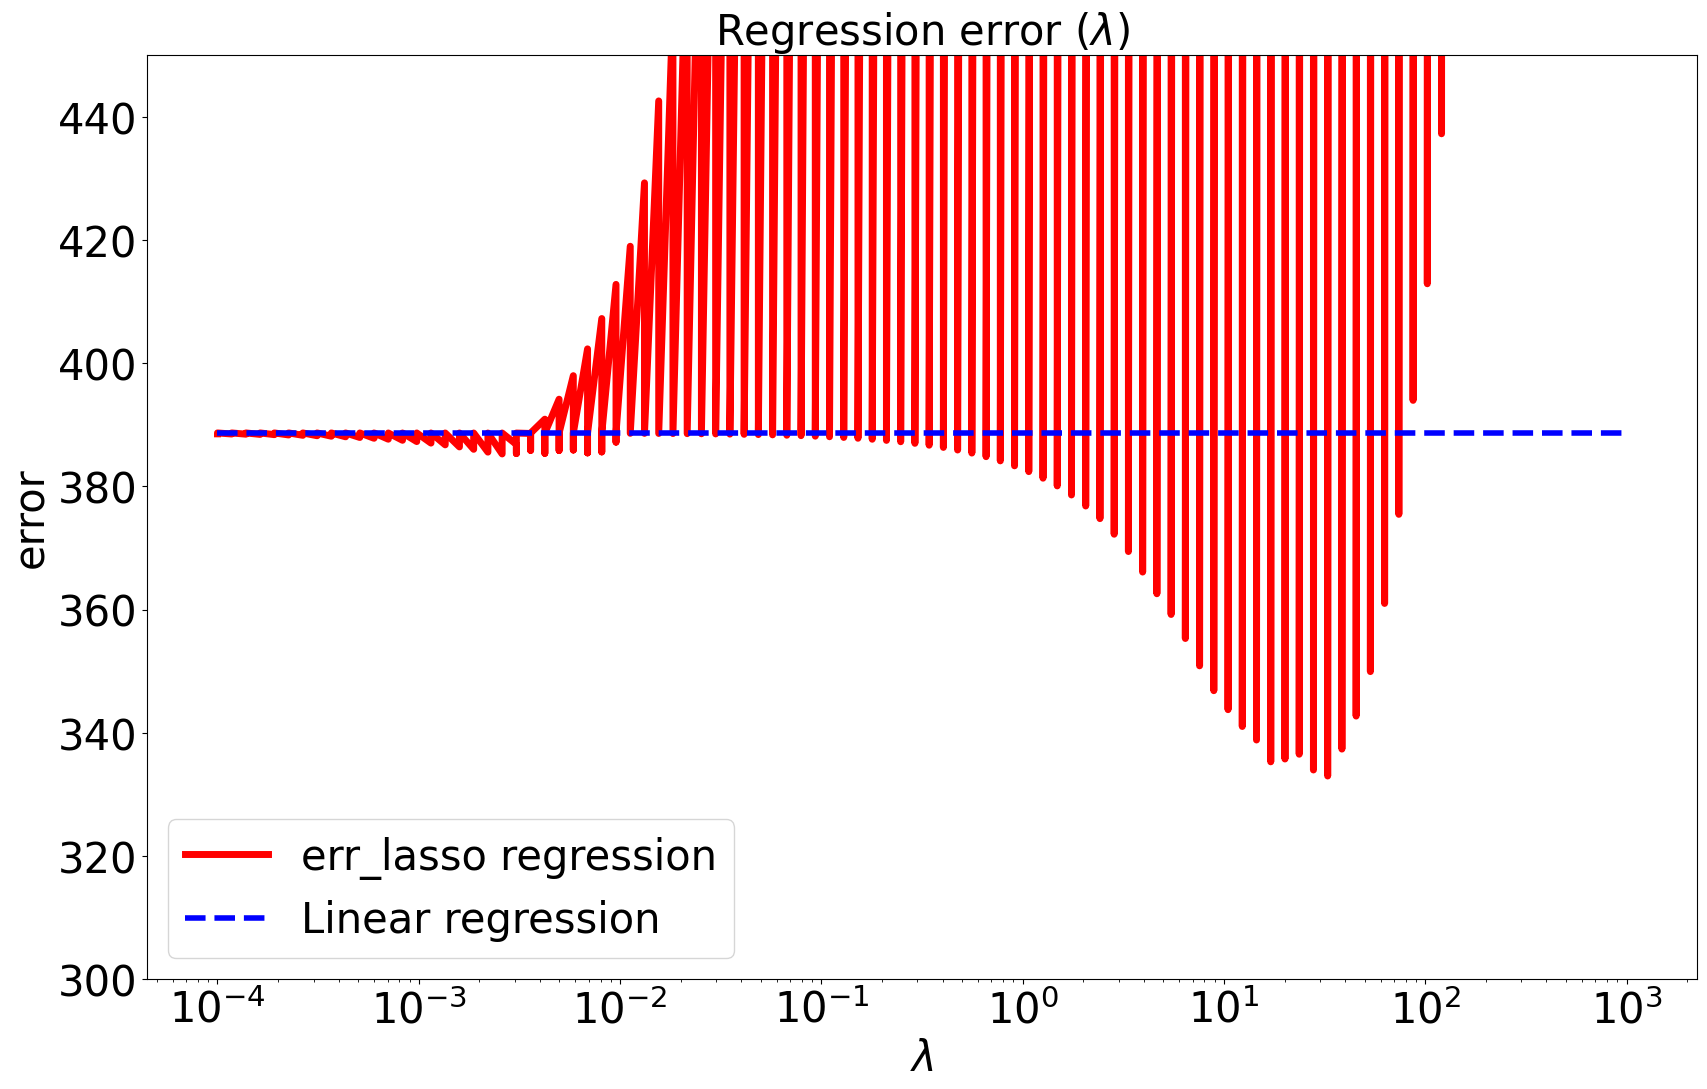

In [207]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas_used, err_elastic_net_model, linewidth=5, color='red', label="err_lasso regression")
ax.plot(alphas_used, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.ylim(300, 450)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [213]:
min(err_elastic_net_model)

332.98786097185354

In [211]:
ratios_used[err_elastic_net_model.index(min(err_elastic_net_model))]

1